# An Introduction to HASC Ballroom Dance Dataset
### Author: Hitoshi MATSUYAMA
### Affiliation: 
Graduate School of Engineering, Nagoya University, Japan
### contact: 
hitoshi[_at_]ucl.nuee.nagoya-u.ac.jp

# Description
In this notebook, I'll show a basic analysis of the HASC_BDD.  
Although my paper has presented an LSTM-based classification method, it needs too long time to train the model. Therefore, I'll adopt LightGBM and very basic feature extraction to show how to explore and build a model with the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Downloads

Please access http://hub.hasc.jp/menu and choose Corpus Download -> HASC_BDD -> csv_ver02.zip
Unzip the file and put csv files as you like.

In [6]:
# Note: the pkl file may not be loaded correctly due to pandas version difference
# You can choose read_csv to avoid the problem
wearable = pd.read_pickle("csv/WearableSensorData_wM_noCut.pkl")
keypoint = pd.read_pickle("csv/KeypointData_woScl_noCut.pkl")
# wearable = pd.read_csv("csv/WearableSensorData_wM_noCut.csv")
# keypoint = pd.read_csv("csv/KeypointData_woScl_noCut.csv")

# Contents
## wearable sensor data
The wearable sensor data contains:
- id: data id for each sample
- dancer: dancer codes, each of which stands for individual dancer (0 - 6)
- video: trial number for each dancer. each dancer has 20 times trials.
- figure: label data. contains "NotPerforming" and dance figure names(Please refer to readme)
- 0_accx, 0_accy, ..., 5_gyrz: acceleration and angular velocity data. The head numbers stands for the place on which the wearable sensors are attached(0:LeftAnkle, 1:LeftArm, 2:LeftHip, 3:RightAnkle, 4:RightArm, 5:RightHip)

## keypoint data
The keypoint data contains:
- id: data id for each sample
- dancer: dancer codes, each of which stands for individual dancer (0 - 6)
- video: trial number for each dancer. each dancer has 20 times trials.
- figure: label data. contains "NotPerforming" and dance figure names(Please refer to readme)
- Nose_x, Nose_y, ...: Location(x, y) for each body part obtained from OpenPose.

In [7]:
display(wearable.head())
display(keypoint.head())

,id,dancer,video,figure,0_accx,0_accy,0_accz,0_gyrx,0_gyry,0_gyrz,...,4_accz,4_gyrx,4_gyry,4_gyrz,5_accx,5_accy,5_accz,5_gyrx,5_gyry,5_gyrz
1,1,0,0,NotPerforming,10022.882605,-800.708645,-1.577029,153.717323,-94.030796,126.953559,...,-1619.813132,-7032.089031,-659.931807,4750.572121,9802.292693,1618.313204,1799.186769,-453.326652,-886.215568,202.408347
2,2,0,0,NotPerforming,10013.573282,-855.853149,70.969233,126.368089,-104.167488,114.121198,...,-1567.222245,-6112.587081,-659.404469,4295.960500,9771.109127,1554.851846,1786.111200,-237.797477,-866.488238,207.612413
3,3,0,0,NotPerforming,9964.972082,-897.361904,204.145674,100.830641,-119.125917,108.464498,...,-1579.069198,-4535.832588,-651.385223,3772.762099,9873.561627,1590.891790,1625.642225,-145.005261,-1055.300213,235.877465
4,4,0,0,NotPerforming,10061.651831,-886.934818,20.042846,155.727138,-126.202414,72.426919,...,-1617.812802,-2993.979692,-640.187351,3172.508456,9838.610954,1420.551551,1592.054206,-192.900894,-1047.537753,290.692528
5,5,0,0,NotPerforming,10003.590824,-812.241211,-2.962767,86.284727,-121.840660,74.967931,...,-1588.326530,-1772.755289,-581.584021,2635.108439,9764.823526,1342.523892,1537.014055,-159.779615,-975.866509,243.677237


,id,dancer,video,figure,Nose_x,Nose_y,Neck_x,Neck_y,RShoulder_x,RShoulder_y,...,LSmallToe_x,LSmallToe_y,LHeel_x,LHeel_y,RBigToe_x,RBigToe_y,RSmallToe_x,RSmallToe_y,RHeel_x,RHeel_y
1,1,0,0,NotPerforming,0.610879,0.194879,0.579634,0.324534,0.505237,0.334107,...,0.652255,-0.318501,0.544332,-0.696946,0.488459,-0.530580,0.440095,-0.162745,0.325172,-0.516669
2,2,0,0,NotPerforming,0.600641,0.194879,0.579581,0.323812,0.505073,0.334060,...,0.652208,-0.318733,0.544529,-0.696885,0.488195,-0.531254,0.425840,-0.163297,0.325223,-0.516247
3,3,0,0,NotPerforming,0.600460,0.194644,0.579634,0.322898,0.505018,0.333449,...,0.652115,-0.318998,0.544430,-0.698038,0.488406,-0.531029,0.439947,-0.162907,0.325172,-0.515886
4,4,0,0,NotPerforming,0.600351,0.194492,0.579581,0.322802,0.504909,0.332369,...,0.652115,-0.319098,0.544578,-0.696764,0.488195,-0.532634,0.439799,-0.163800,0.339474,-0.516609
5,5,0,0,NotPerforming,0.600315,0.194464,0.579686,0.321022,0.505018,0.329975,...,0.652115,-0.319429,0.544480,-0.697583,0.503613,-0.531703,0.440342,-0.163394,0.339424,-0.516579


In [9]:
# contains a bit nulls
# however, it's just occurred when the data is generated to csv
# so there's no nulls in the recorded sensor data
wearable.isnull().sum()

id         0
dancer     0
video      0
figure     0
0_accx     0
0_accy     0
0_accz     0
0_gyrx     0
0_gyry     0
0_gyrz     0
1_accx     0
1_accy     0
1_accz     0
1_gyrx     0
1_gyry     0
1_gyrz     0
2_accx     1
2_accy     1
2_accz     1
2_gyrx     1
2_gyry     1
2_gyrz     1
3_accx    89
3_accy    89
3_accz    89
3_gyrx    89
3_gyry    89
3_gyrz    89
4_accx     0
4_accy     0
4_accz     0
4_gyrx     0
4_gyry     0
4_gyrz     0
5_accx     0
5_accy     0
5_accz     0
5_gyrx     0
5_gyry     0
5_gyrz     0
dtype: int64

In [11]:
wearable = wearable.fillna("median")

In [12]:
wearable.groupby(["dancer", "video", "figure"]).mean()["0_accx"][0][0]

figure
Aida             11724.494058
Alemana          10362.302685
Fan              10826.101947
FootChange        9607.360724
HandToHandL       9583.887600
HandToHandR      10301.284155
HockyStick        9713.568350
NaturalTop        9292.286381
NewYorkL          9474.034887
NewYorkR         10844.121155
NotPerforming    10324.152559
OpenBasic        10709.994617
OpeningOut       11915.514933
SpotTurn          9574.257402
Name: 0_accx, dtype: float64

In [13]:
# Dict of dance figures is prepared so that we can handle the figure names and codes mutually
figure_dict = {1: "OpenBasic", 2: "FootChange", 3: "Fan", 4: "HockyStick", 5: "NewYorkR", 6: "NewYorkL", 7: "SpotTurn", 8: "NaturalTop", 9: "OpeningOut", 10: "Alemana", 11: "HandToHandR", 12: "HandToHandL", 13: "Aida", 14: "NotPerforming"}
convert_dict = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:5, 8:7, 9:1, 10:8, 11:9, 12:2, 13:3, 14:10, 15:11, 16:12, 17:11, 18:12, 19:13, 20:7, 21:14, 22:14}

### Figure class(label) ratio
In the dataset, the amounts of labels among figure classes are not equal.
This is because the prepared dance amalgamation sometimes contains one dance figure for several times.

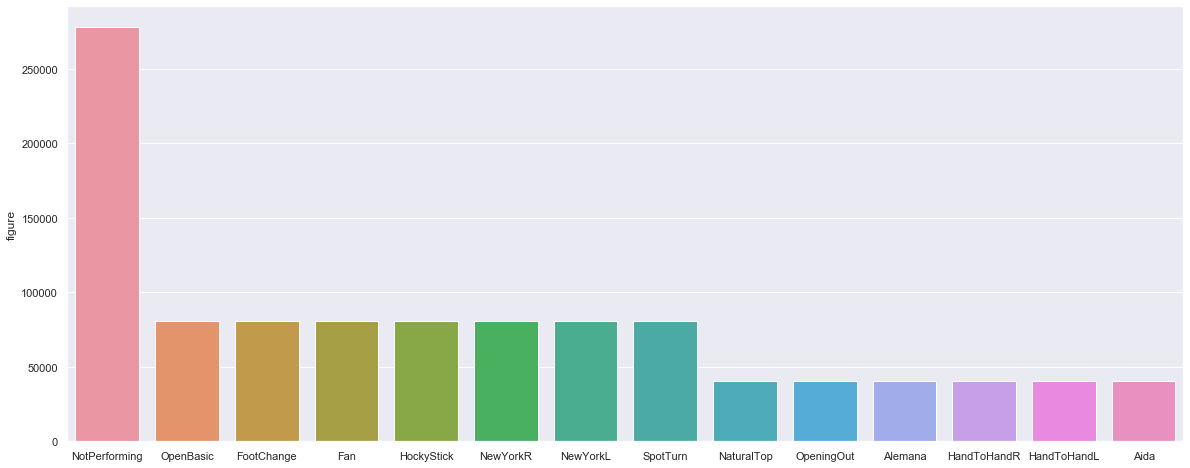

In [63]:
# The number of each label in the wearable sensor data 
fig = plt.figure(figsize=(20, 8))
sns.barplot(wearable.figure.unique(), wearable.figure.value_counts())

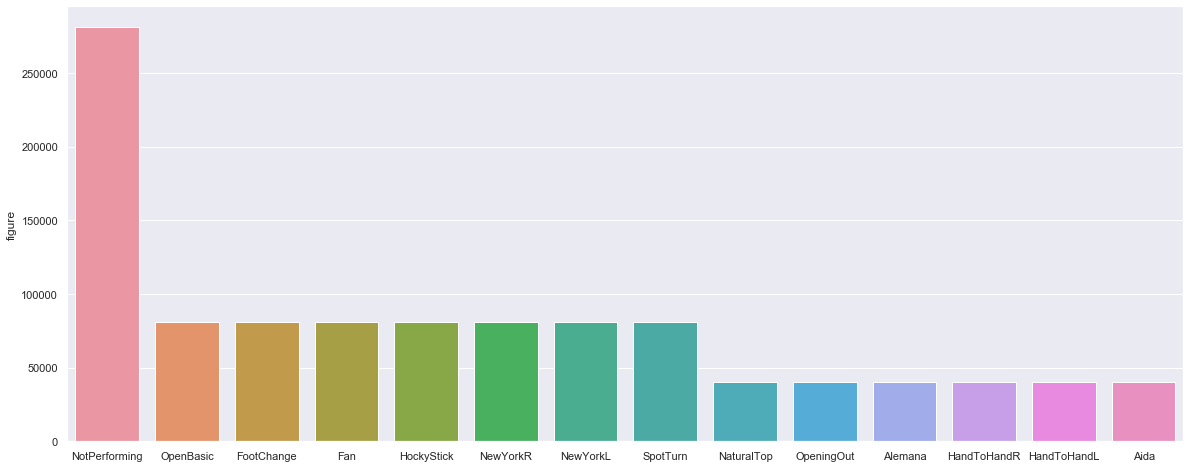

In [65]:
# The number of each label in the keypoint data
# it's basically same as the wearable sensor data
fig = plt.figure(figsize=(20, 8))
sns.barplot(keypoint.figure.unique(), keypoint.figure.value_counts())

# Feature extraction
Now let's perform some basic feature extractions.
Note: this is not what I've presented at ABC2020. The purpose of this notebook is to introduce the data, so I'm just performing conventional machine learnings with basic features to make it easy to be run.

I'm extracting mean and variance of the former/latter half of each dance figure recording.

In [14]:
def feature_extraction_accgyr(df, figure_length):
    columns = df.columns
    modalities = df[columns[4:]]
    col = modalities.columns
    num_figures = int(len(df) / figure_length)
    features = []
    labels = []
    for f in range(num_figures):
        # pick up data for 1 figure (288 samples)
        m = modalities.iloc[f*figure_length:(f+1)*figure_length]
        f_1fig = []
        # append features for each figure
        # 6 * 6 = 36 modalities per a figure using all sensors
        for c in col:
            # first 1/2
            f_1fig.append(np.mean(np.array(m[c])[0:int(figure_length/2)]))
            f_1fig.append(np.var(np.array(m[c])[0:int(figure_length/2)]))
            # second
            f_1fig.append(np.mean(np.array(m[c])[int(figure_length/2):2*int(figure_length/2)]))
            f_1fig.append(np.var(np.array(m[c])[int(figure_length/2):2*int(figure_length/2)]))
            
        features.append(f_1fig)
#         labels.append(df.figure.iloc[f*figure_length])
        labels.append(convert_dict[f+1])
    return features, labels

In [15]:
def feature_extraction_keypoint(df, figure_length):
    columns = df.columns
    modalities = df[columns[4:]]
    col = modalities.columns
    num_figures = int(len(df) / figure_length)
    features = []
    labels = []
    for f in range(num_figures):
        # pick up data for 1 figure (288 samples)
        m = modalities.iloc[f*figure_length:(f+1)*figure_length]
        f_1fig = []
        # append features for each figure
        # 25 * 2 = 50 modalities per a figure using all locations
        for c in col:
            # first 1/2
            f_1fig.append(np.mean(np.array(m[c])[0:int(figure_length/2)]))
            f_1fig.append(np.var(np.array(m[c])[0:int(figure_length/2)]))
            # second
            f_1fig.append(np.mean(np.array(m[c])[int(figure_length/2):2*int(figure_length/2)]))
            f_1fig.append(np.var(np.array(m[c])[int(figure_length/2):2*int(figure_length/2)]))
        features.append(f_1fig)
#         labels.append(df.figure.iloc[f*figure_length])
        labels.append(convert_dict[f+1])
    return features, labels

In [16]:
# The number of dancers and videos may change in the future
dancer_l = range(7)
video_l = range(20)
# each figure contains 288 samples
figure_length = 288

# features, labels of all dancers & all video
features_wearable_dancers = []
labels_wearable_dancers = []
features_keypoint_dancers = []
labels_keypoint_dancers = []

for d in dancer_l:
    # features, labels of all video
    features_wearable_videos = []
    labels_wearable_videos = []
    features_keypoint_videos = []
    labels_keypoint_videos = []
    
    for v in video_l:
        # pick up 1 record from wearable sensor data
        w = wearable[(wearable.dancer == d) & (wearable.video == v)]
        # choose performing labels
        w = w[w.figure != "NotPerforming"]
        # feature extraction
        features_wearable, labels_wearable = feature_extraction_accgyr(w, figure_length)

        
        # pick up 1 record from keypoint data
        k = keypoint[(keypoint.dancer == d) & (keypoint.video == v)]
        k = k[k.figure != "NotPerforming"]
        # feature extraction
        features_keypoint, labels_keypoint = feature_extraction_keypoint(k, figure_length)
        
        # append features, labels of 1 video
        features_wearable_videos.append(features_wearable)
        labels_wearable_videos.append(labels_wearable)
        features_keypoint_videos.append(features_keypoint)
        labels_keypoint_videos.append(labels_keypoint)
        
    # append features, labels of 1 dancer
    features_wearable_dancers.append(features_wearable_videos)
    labels_wearable_dancers.append(labels_wearable_videos)
    features_keypoint_dancers.append(features_keypoint_videos)
    labels_keypoint_dancers.append(labels_keypoint_videos)
        


# classification
Let's simply use LightGBM as the classifier

In [27]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
features_wearable = np.array(features_wearable_dancers)
labels_wearable = np.array(labels_wearable_dancers)
features_keypoint = np.array(features_keypoint_dancers)
labels_keypoint = np.array(labels_keypoint_dancers)

In [29]:
# shape: dancers, videos, figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(7, 20, 20, 144)
(7, 20, 20)
(7, 20, 20, 200)
(7, 20, 20)


In [30]:
features_wearable = features_wearable.reshape(features_wearable.shape[0]*features_wearable.shape[1]*features_wearable.shape[2], features_wearable.shape[3])
labels_wearable = labels_wearable.reshape(labels_wearable.shape[0]*labels_wearable.shape[1]*labels_wearable.shape[2], 1)
features_keypoint = features_keypoint.reshape(features_keypoint.shape[0]*features_keypoint.shape[1]*features_keypoint.shape[2], features_keypoint.shape[3])
labels_keypoint = labels_keypoint.reshape(labels_keypoint.shape[0]*labels_keypoint.shape[1]*labels_keypoint.shape[2], 1)

In [31]:
# shape: dancers*videos*figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(2800, 144)
(2800, 1)
(2800, 200)
(2800, 1)


In [32]:
features_wearable[0][2].dtype

dtype('float64')

### wearable sensors

In [33]:
import collections
X = features_wearable
y = labels_wearable.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)
print(X.shape)
print(y.shape)
print(collections.Counter(list(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# print accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800, 144)
(2800,)
Counter({0: 280, 1: 280, 2: 280, 4: 280, 6: 280, 10: 280, 11: 280, 3: 140, 5: 140, 7: 140, 8: 140, 9: 140, 12: 140})
(2100, 144)
(2100,)
[1]	valid_0's multi_logloss: 2.34455
[2]	valid_0's multi_logloss: 2.21957
[3]	valid_0's multi_logloss: 2.11687
[4]	valid_0's multi_logloss: 2.03302
[5]	valid_0's multi_logloss: 1.96682
[6]	valid_0's multi_logloss: 1.90166
[7]	valid_0's multi_logloss: 1.84632
[8]	valid_0's multi_logloss: 1.79629
[9]	valid_0's multi_logloss: 1.75668
[10]	valid_0's multi_logloss: 1.71364
[11]	valid_0's multi_logloss: 1.67525
[12]	valid_0's multi_logloss: 1.63858
[13]	valid_0's multi_logloss: 1.61038
[14]	valid_0's multi_logloss: 1.58185
[15]	valid_0's multi_logloss: 1.5604
[16]	valid_0's multi_logloss: 1.53748
[17]	valid_0's multi_logloss: 1.51602
[18]	valid_0's multi_logloss: 1.49604
[19]	valid_0's multi_logloss: 1.47431
[20]	valid_0's multi_logloss: 1.45525
[21]	valid_0's multi_logloss: 1.43877
[22]	valid_0's multi_logloss: 1.4208
[23]	valid_0's mul

In [34]:
from sklearn.ensemble import RandomForestClassifier
X = features_wearable
y = labels_wearable.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print(accuracy)

(2800,)
0.59


### Keypoint

In [35]:
X = features_keypoint
y = labels_keypoint.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# print accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800,)
[1]	valid_0's multi_logloss: 2.39922
[2]	valid_0's multi_logloss: 2.31225
[3]	valid_0's multi_logloss: 2.23816
[4]	valid_0's multi_logloss: 2.17697
[5]	valid_0's multi_logloss: 2.11931
[6]	valid_0's multi_logloss: 2.06018
[7]	valid_0's multi_logloss: 2.00839
[8]	valid_0's multi_logloss: 1.96723
[9]	valid_0's multi_logloss: 1.92892
[10]	valid_0's multi_logloss: 1.89425
[11]	valid_0's multi_logloss: 1.86426
[12]	valid_0's multi_logloss: 1.83245
[13]	valid_0's multi_logloss: 1.80714
[14]	valid_0's multi_logloss: 1.78409
[15]	valid_0's multi_logloss: 1.75879
[16]	valid_0's multi_logloss: 1.73816
[17]	valid_0's multi_logloss: 1.72065
[18]	valid_0's multi_logloss: 1.70266
[19]	valid_0's multi_logloss: 1.68508
[20]	valid_0's multi_logloss: 1.66695
[21]	valid_0's multi_logloss: 1.65209
[22]	valid_0's multi_logloss: 1.6368
[23]	valid_0's multi_logloss: 1.62394
[24]	valid_0's multi_logloss: 1.61347
[25]	valid_0's multi_logloss: 1.60108
[26]	valid_0's multi_logloss: 1.59002
[27]	valid_0's

## Hybrid

In [36]:
# shape: dancers*videos*figures, feature vectors
print(features_wearable.shape)
print(labels_wearable.shape)
print(features_keypoint.shape)
print(labels_keypoint.shape)

(2800, 144)
(2800, 1)
(2800, 200)
(2800, 1)


In [37]:
features_hybrid = np.concatenate([features_wearable, features_keypoint], 1)
labels_hybrid = labels_wearable

In [38]:
X = features_hybrid
y = labels_hybrid.reshape(-1)
# convert string labels to int
le = LabelEncoder()
le = le.fit(y)
y = le.transform(y)

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 13,
}
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
# calculate accuracy
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(accuracy)

(2800,)
[1]	valid_0's multi_logloss: 2.38843
[2]	valid_0's multi_logloss: 2.26048
[3]	valid_0's multi_logloss: 2.1691
[4]	valid_0's multi_logloss: 2.09258
[5]	valid_0's multi_logloss: 2.02471
[6]	valid_0's multi_logloss: 1.96215
[7]	valid_0's multi_logloss: 1.89991
[8]	valid_0's multi_logloss: 1.84752
[9]	valid_0's multi_logloss: 1.80218
[10]	valid_0's multi_logloss: 1.75855
[11]	valid_0's multi_logloss: 1.71558
[12]	valid_0's multi_logloss: 1.67843
[13]	valid_0's multi_logloss: 1.64277
[14]	valid_0's multi_logloss: 1.61011
[15]	valid_0's multi_logloss: 1.58047
[16]	valid_0's multi_logloss: 1.55188
[17]	valid_0's multi_logloss: 1.52645
[18]	valid_0's multi_logloss: 1.50401
[19]	valid_0's multi_logloss: 1.48176
[20]	valid_0's multi_logloss: 1.45911
[21]	valid_0's multi_logloss: 1.43969
[22]	valid_0's multi_logloss: 1.41806
[23]	valid_0's multi_logloss: 1.39843
[24]	valid_0's multi_logloss: 1.38005
[25]	valid_0's multi_logloss: 1.36217
[26]	valid_0's multi_logloss: 1.34732
[27]	valid_0's

### Confusion matrix of the hybrid classification
Let's check how the classification worked.

Labels: ['OpenBasic', 'FootChange', 'Fan', 'HockyStick', 'NewYorkR', 'NewYorkL', 'SpotTurn', 'NaturalTop', 'OpeningOut', 'Alemana', 'HandToHandR', 'HandToHandL', 'Aida']


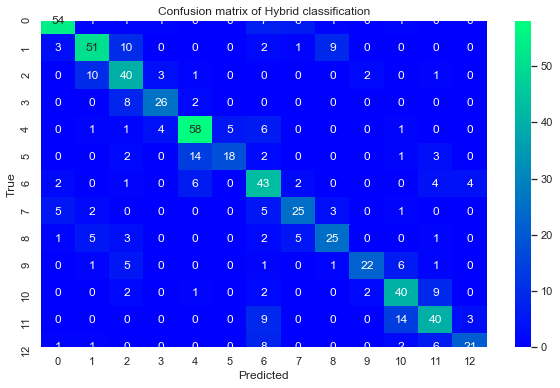

In [55]:
labels = [figure_dict[x+1] for x in range(13)]
print("Labels:", labels)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_max)
fig = plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="winter")

plt.title("Confusion matrix of Hybrid classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()